<a href="https://colab.research.google.com/github/rifyalt/basic_python/blob/main/15_moreplots_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sns.load_dataset?

In [ ]:
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
plt.scatter()

#### Scatterplot

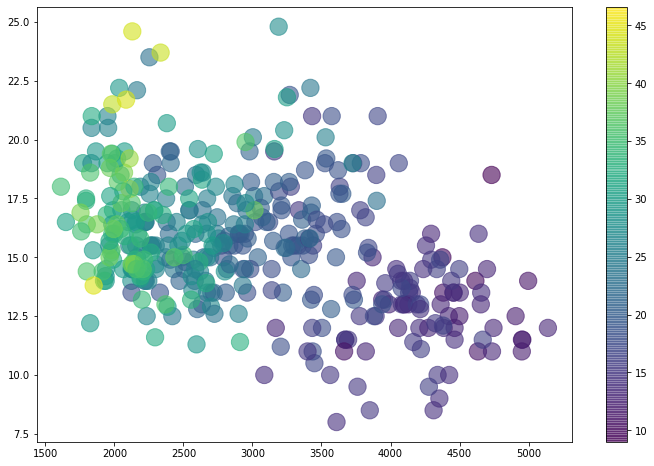

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['weight'], df['acceleration'], s=300, c=df['mpg'], alpha=0.6)
plt.colorbar()
plt.show()

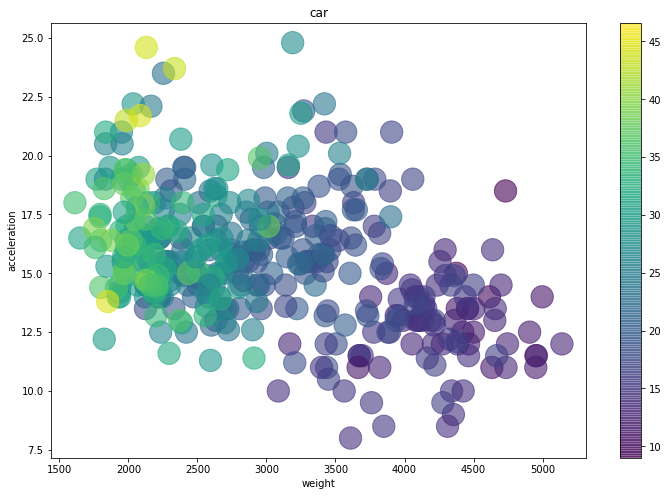

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df['weight'], df['acceleration'], s=500, c=df['mpg'], alpha=0.6)
plt.colorbar()
plt.title('car')
plt.xlabel('weight')
plt.ylabel('acceleration')
plt.show()

### Histogram

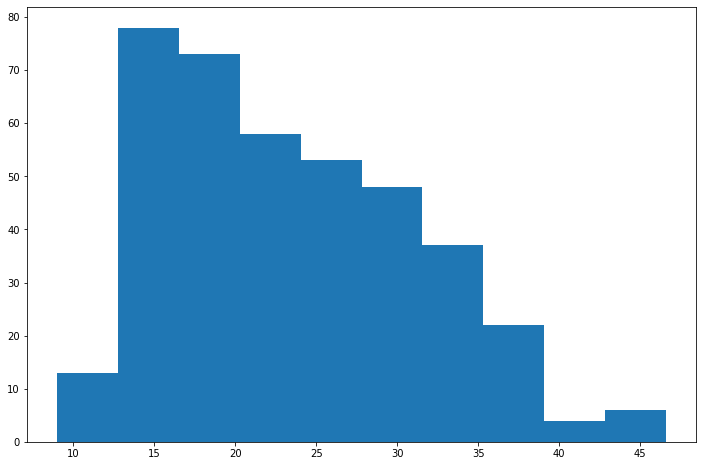

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df['mpg'], bins=10)
plt.show()

In [ ]:
df_group = df.groupby('origin')[['mpg', 'horsepower', 'acceleration']].mean()
df_group

,mpg,horsepower,acceleration
origin,,,
europe,27.891429,80.558824,16.787143
japan,30.450633,79.835443,16.172152
usa,20.083534,119.048980,15.033735


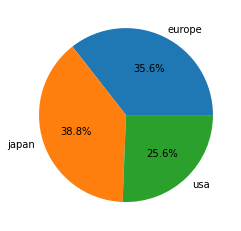

In [ ]:
plt.pie(df_group['mpg'], labels=df_group.index, autopct='%1.1f%%');

### BArplot

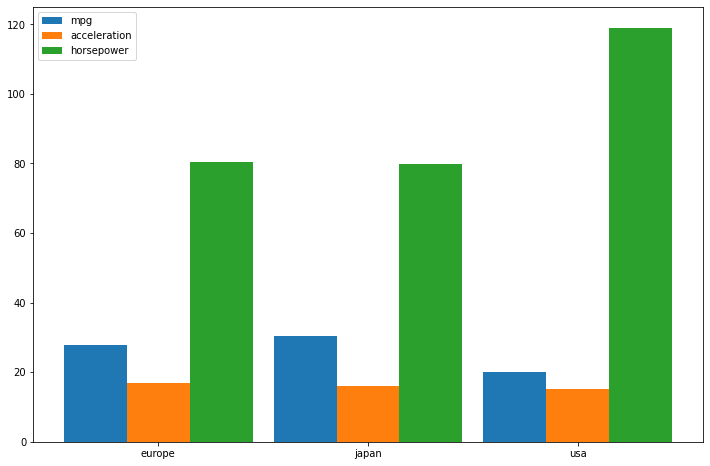

In [ ]:

plt.figure(figsize=(12,8))

x = np.arange(3)
width = 0.3

plt.bar(x, df_group['mpg'], width, label='mpg')
plt.bar(x+0.3, df_group['acceleration'], width, label='acceleration')
plt.bar(x+0.6, df_group['horsepower'], width, label='horsepower')
plt.xticks(x+0.3, labels=df_group.index)
plt.legend()
plt.show()

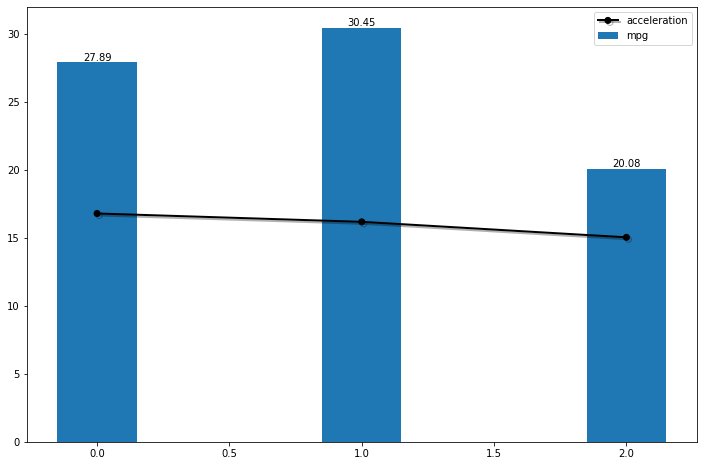

In [ ]:
from matplotlib.patheffects import PathPatchEffect, SimpleLineShadow, Normal
plt.figure(figsize=(12,8))

x = np.arange(3)
width = 0.3

bar = plt.bar(x, df_group['mpg'], width, label='mpg')
plt.plot(df_group[['acceleration']].values, color = 'k',linestyle='-', marker='o', linewidth=2.0, label='acceleration', path_effects=[SimpleLineShadow(), Normal()])
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height+.005,
                str(round(height, 2)),
                                ha='center', va='bottom')
autolabel(bar)
plt.legend()
plt.show()

In [ ]:
for i,j in enumerate(df_group.columns):
  print(i,j)

0 mpg
1 horsepower
2 acceleration


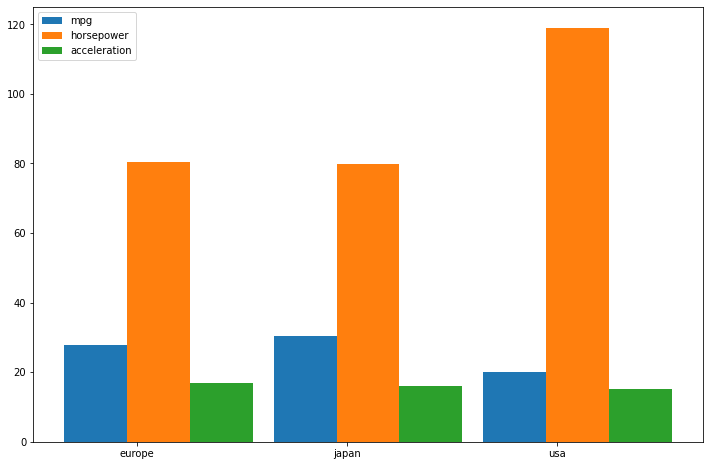

In [ ]:
#menggunakan enumerate

plt.figure(figsize=(12,8))

x = np.arange(3)
width = 0.3

for i,j in enumerate(df_group.columns): 
  plt.bar(x+(i*width), df_group[j], width, label=j)

plt.xticks(x+0.2, df_group.index)
plt.legend()
plt.show()

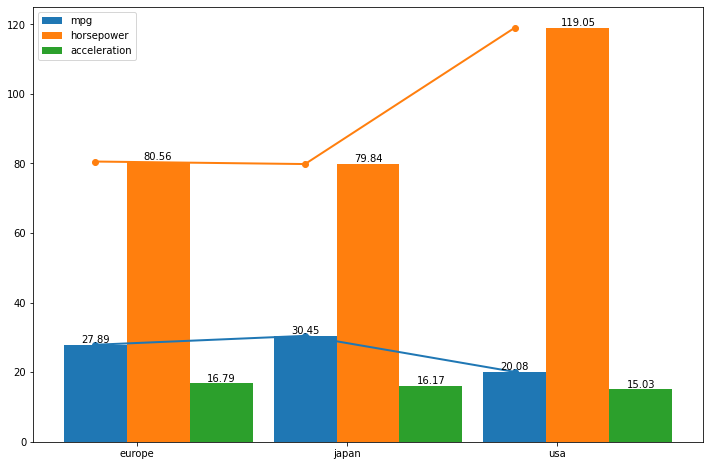

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()

x = np.arange(3)
width = 0.3

for i,j in enumerate(df_group.columns): 
  bar = plt.bar(x+(i*width), df_group[j], width, label=j)
  autolabel(bar)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height+.005,
                str(round(height, 2)),
                                ha='center', va='bottom')

# ax = df_group[['mpg','horsepower', 'acceleration']].unstack('STK_ID').plot(kind='bar', use_index=True)


plt.xticks(x+0.2, df_group.index)
plt.legend()
plt.show()

### Stacked Barplot

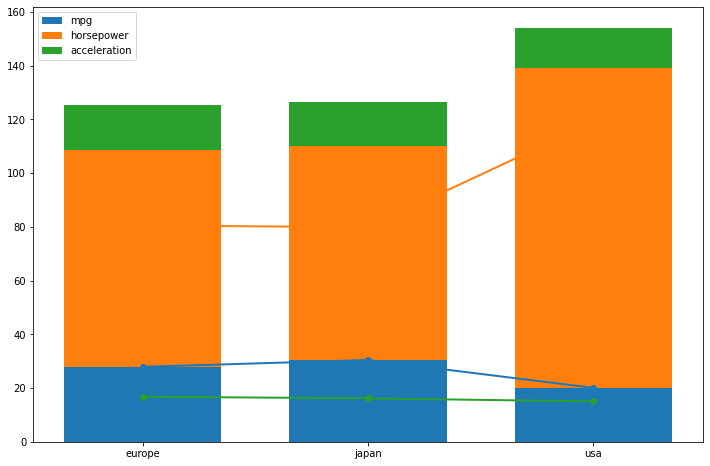

In [ ]:
plt.figure(figsize=(12,8))

x = df_group.index
width = 0.7

plt.bar(x, df_group['mpg'], width, label='mpg')
plt.bar(x, df_group['horsepower'], width, bottom = df_group['mpg'], label='horsepower')
plt.bar(x, df_group['acceleration'], width, bottom = df_group['mpg']+df_group['horsepower'],label='acceleration')

plt.plot(df_group[['mpg', 'horsepower', 'acceleration']].values, linestyle='-', marker='o', linewidth=2.0)

# plt.xticks(x+0.2, df_group.index)
plt.legend()
plt.show()

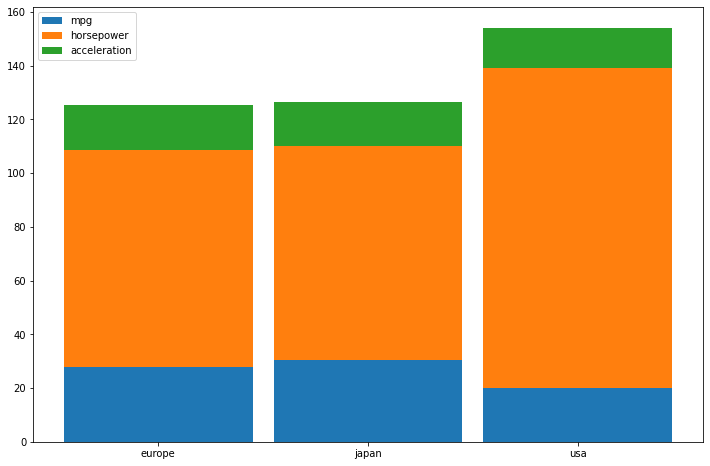

In [ ]:
plt.figure(figsize=(12,8))
x = df_group.index
width = 0.9
y_bottom = 0

for i,j in enumerate(df_group.columns):
  plt.bar(x, df_group[j], width, label=j, bottom=y_bottom)
  y_bottom += df_group[j]

plt.legend()
plt.show()


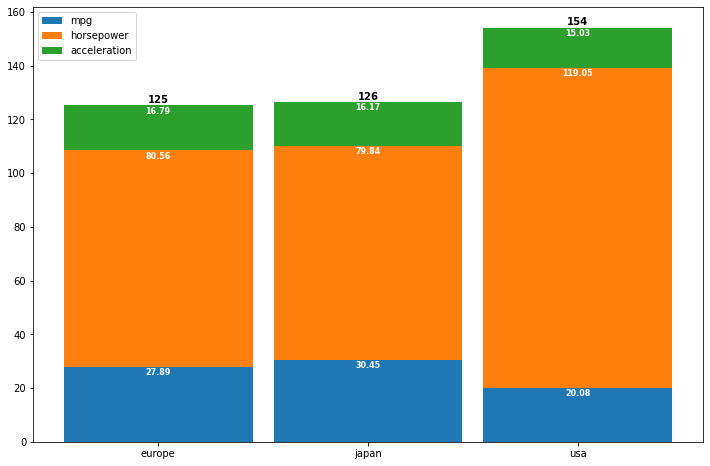

In [ ]:
#menggunakan enumerate

# plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

x = df_group.index
width = 0.9
y_bottom = 0

for i,j in enumerate(df_group.columns): 
  ax.bar(x, df_group[j], width, label=j, bottom=y_bottom)
  y_bottom += df_group[j]

# Sum up the rows of our data to get the total value of each bar.
totals = df_group.sum(axis=1)
# Set an offset that is used to bump the label up a bit above the bar.
y_offset = 1

for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold')
  
y_offset = -3
# For each patch (basically each rectangle within the bar), add a label.
for bar in ax.patches:
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height(),2),
      # Center the labels and style them a bit.
      ha='center',
      color='w',
      weight='bold',
      size=8
  )
# plt.xticks(x+0.2, df_group.index)
plt.legend()
plt.show()

### statistical plot

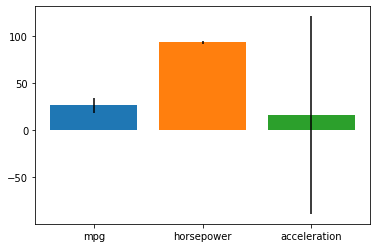

In [ ]:
for i in range(len(df_group)):
  plt.bar(df_mean.index[i], df_mean.values[i], yerr=df.std()[i])

In [ ]:
df.acceleration.unique()

array([12. , 11.5, 11. , 10.5, 10. ,  9. ,  8.5,  8. ,  9.5, 15. , 15.5,
       16. , 14.5, 20.5, 17.5, 12.5, 14. , 13.5, 18.5, 19. , 13. , 19.5,
       18. , 17. , 23.5, 16.5, 21. , 16.9, 14.9, 17.7, 15.3, 13.9, 12.8,
       15.4, 17.6, 22.2, 22.1, 14.2, 17.4, 16.2, 17.8, 12.2, 16.4, 13.6,
       15.7, 13.2, 21.9, 16.7, 12.1, 14.8, 18.6, 16.8, 13.7, 11.1, 11.4,
       18.2, 15.8, 15.9, 14.1, 21.5, 14.4, 19.4, 19.2, 17.2, 18.7, 15.1,
       13.4, 11.2, 14.7, 16.6, 17.3, 15.2, 14.3, 20.1, 24.8, 11.3, 12.9,
       18.8, 18.1, 17.9, 21.7, 23.7, 19.9, 21.8, 13.8, 12.6, 16.1, 20.7,
       18.3, 20.4, 19.6, 17.1, 15.6, 24.6, 11.6])

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64